In [1]:
import pandas as pd
import yfinance as yf
import plotly.graph_objs as go
import seaborn as sns
import numpy as np

In [14]:
data = yf.download(tickers='ARQQ', period='1d', interval='1m')


[*********************100%***********************]  1 of 1 completed


In [17]:
data.iloc[-20:, :]

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-06-08 12:03:00-04:00,1.5450,1.5450,1.5450,1.5450,1.5450,204
2023-06-08 12:04:00-04:00,1.5450,1.5450,1.5300,1.5300,1.5300,14086
2023-06-08 12:05:00-04:00,1.5359,1.5391,1.5359,1.5391,1.5391,1702
2023-06-08 12:06:00-04:00,1.5350,1.5485,1.5350,1.5485,1.5485,18829
2023-06-08 12:07:00-04:00,1.5450,1.5450,1.5400,1.5406,1.5406,5215
2023-06-08 12:08:00-04:00,1.5400,1.5400,1.5341,1.5350,1.5350,0
2023-06-08 12:09:00-04:00,1.5300,1.5350,1.5100,1.5150,1.5150,15702
2023-06-08 12:10:00-04:00,1.5120,1.5200,1.5000,1.5200,1.5200,21534
2023-06-08 12:11:00-04:00,1.5250,1.5250,1.5220,1.5220,1.5220,4300


In [19]:
data['Mean'] = (data['High'] + data['Low'])/2

In [27]:
fig = go.Figure()
fig.add_trace(go.Candlestick(x=np.linspace(0,data.shape[0], data.shape[0]),
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'], name = 'market data'))
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=15, label="15m", step="minute", stepmode="backward"),
            dict(count=45, label="45m", step="minute", stepmode="backward"),
            dict(count=1, label="HTD", step="hour", stepmode="todate"),
            dict(count=3, label="3h", step="hour", stepmode="backward"),
            dict(step="all")
        ])
    )
)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'close': array([9.28999996, 9.34000015, 9.42000008, ..., 9.42099953, 9.42000008,
                              9.40999985]),
              'high': array([9.28999996, 9.34000015, 9.42000008, ..., 9.42099953, 9.42000008,
                             9.40999985]),
              'low': array([9.28999996, 9.34000015, 9.38000011, ..., 9.42099953, 9.42000008,
                            9.40999985]),
              'name': 'market data',
              'open': array([9.28999996, 9.34000015, 9.38000011, ..., 9.42099953, 9.42000008,
                             9.40999985]),
              'type': 'candlestick',
              'x': array([0.00000000e+00, 1.00076570e+00, 2.00153139e+00, ..., 1.30499847e+03,
                          1.30599923e+03, 1.30700000e+03])}],
    'layout': {'template': '...',
               'xaxis': {'rangeselector': {'buttons': [{'count': 15,
                                                        'label': '15m',
                                                        'step': 'minute',
                                                        'stepmode': 'backward'},
                                                       {'count': 45,
                                                        'label': '45m',
                                                        'step': 'minute',
                                                        'stepmode': 'backward'},
                                                       {'count': 1, 'label': 'HTD', 'step': 'hour', 'stepmode': 'todate'},
                                                       {'count': 3, 'label': '3h', 'step': 'hour', 'stepmode': 'backward'},
                                                       {'step': 'all'}]},
                         'rangeslider': {'visible': True}}}
})

<Axes: xlabel='Datetime', ylabel='Mean'>

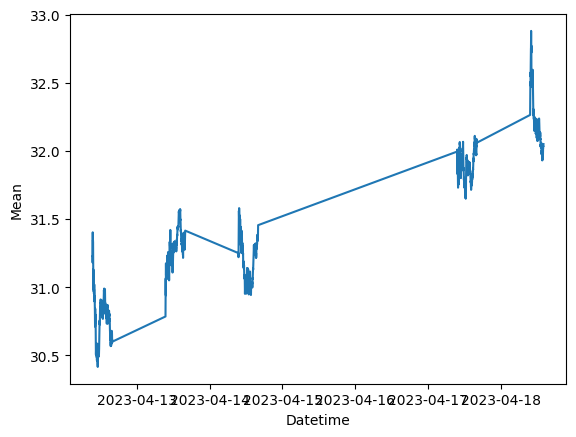

In [16]:
sns.lineplot(data=data, x=data.index, y='Mean')